In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


df = pd.read_csv("Sunspots.csv")



df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Year_sin'] = np.sin(2 * np.pi * df['Year'] / 365)
df['Year_cos'] = np.cos(2 * np.pi * df['Year'] / 365)


df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Diff_11Year'] = df['Monthly Mean Total Sunspot Number'].diff(periods=132)


df.dropna(inplace=True)


features = ['Month_sin', 'Month_cos', 'Year_sin', 'Year_cos', 'Year','Date',
            'Sunspot_lag1',  'Diff_11Year','Year','Month','Day','Sunspot_lag12','Date']
X = df[features]
y = df['Monthly Mean Total Sunspot Number']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

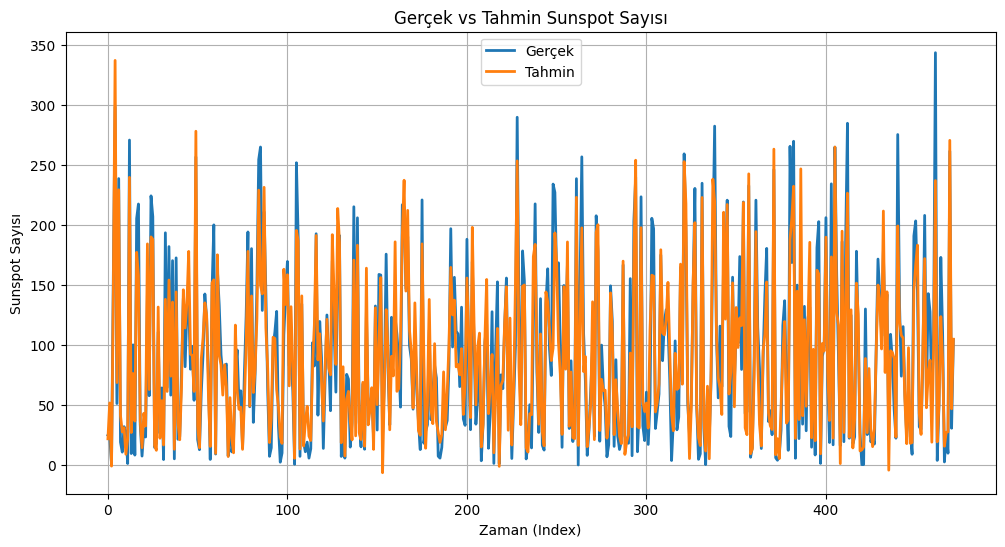

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Gerçek', linewidth=2)
plt.plot(y_pred, label='Tahmin', linewidth=2)
plt.title('Gerçek vs Tahmin Sunspot Sayısı')
plt.xlabel('Zaman (Index)')
plt.ylabel('Sunspot Sayısı')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results_df = X_test.copy()
results_df['Monthly Mean Total Sunspot Number'] = y_test.values
results_df['Forecast_Sunspot'] = y_pred
results_df['Diff'] = y_test.values - y_pred
results_df.reset_index(drop=True, inplace=True)
results_df.to_csv("ForecastSun.csv", index=False)

In [ ]:
df = pd.read_csv('ForecastSun.csv')
df

,Month_sin,Month_cos,Day_sin,Day_cos,Year,Sunspot_lag1,Diff_11Year,Year.1,Month,Day,Sunspot_lag12,Date,Monthly Mean Total Sunspot Number,Forecast_Sunspot,Diff
0,8.660254e-01,0.500000,-3.943559e-01,0.918958,1876,23.9,-67.4,1876,2,29,35.9,1876-02-29,25.1,21.985264,3.114736
1,-2.449294e-16,1.000000,-2.449294e-16,1.000000,1865,46.7,0.2,1865,12,31,54.3,1865-12-31,24.3,51.875551,-27.575551
2,5.000000e-01,0.866025,-2.449294e-16,1.000000,2009,1.0,-43.2,2009,1,31,4.1,2009-01-31,1.3,-0.752910,2.052910
3,-8.660254e-01,0.500000,-2.449294e-16,1.000000,1988,142.7,94.4,1988,10,31,63.4,1988-10-31,156.5,143.002852,13.497148
4,-5.000000e-01,0.866025,-2.012985e-01,0.979530,1957,359.4,92.3,1957,11,30,285.0,1957-11-30,298.6,337.383586,-38.783586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,-5.000000e-01,0.866025,-2.012985e-01,0.979530,2005,13.2,-2.0,2005,11,30,70.1,2005-11-30,27.5,27.222871,0.277129
468,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,1877,23.6,-21.4,1877,7,31,25.5,1877-07-31,10.0,27.858869,-17.858869
469,-8.660254e-01,0.500000,-2.449294e-16,1.000000,1787,262.2,211.7,1787,10,31,187.2,1787-10-31,261.7,270.762104,-9.062104
470,5.000000e-01,0.866025,-2.449294e-16,1.000000,1945,47.4,25.1,1945,1,31,6.1,1945-01-31,30.8,46.967782,-16.167782


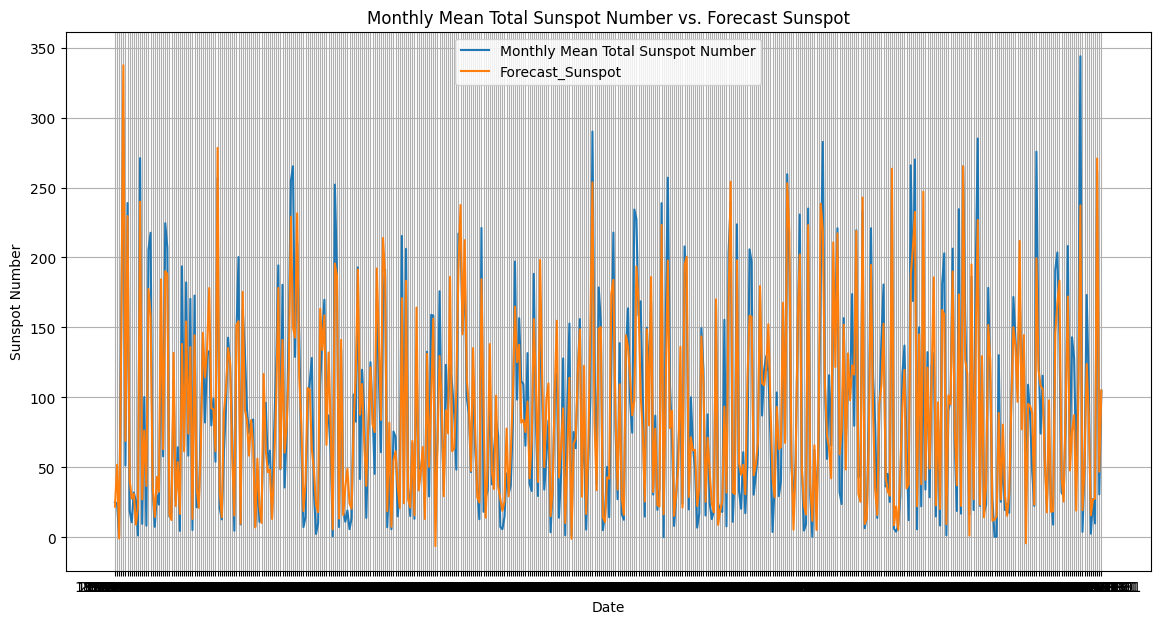

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'], label='Monthly Mean Total Sunspot Number')
plt.plot(df['Date'], df['Forecast_Sunspot'], label='Forecast_Sunspot')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Monthly Mean Total Sunspot Number vs. Forecast Sunspot')
plt.legend()
plt.grid(True)
plt.show()

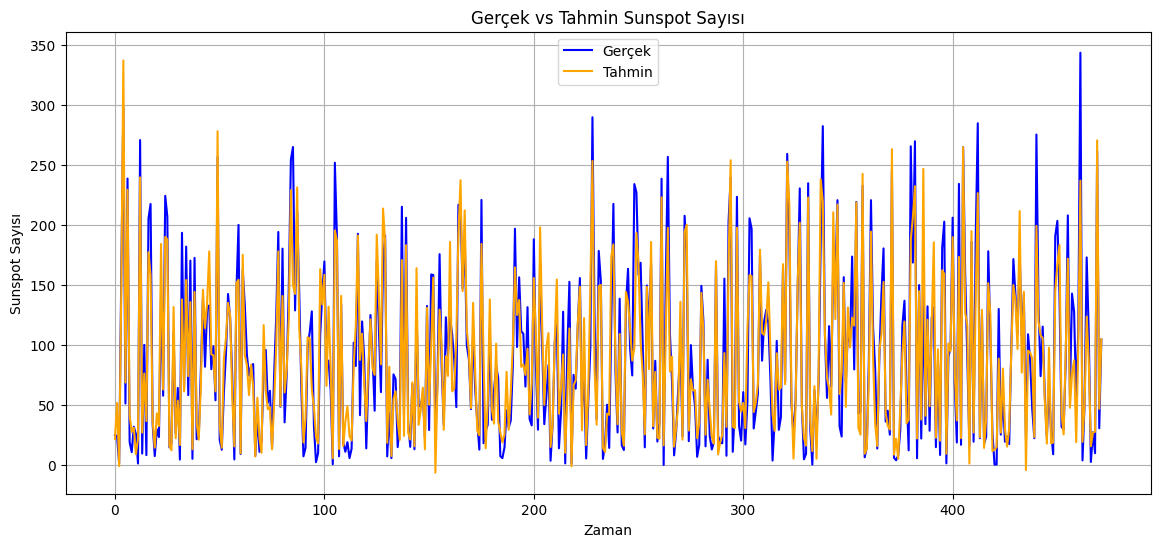

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Gerçek', color='blue')
plt.plot(y_pred, label='Tahmin', color='orange')
plt.title('Gerçek vs Tahmin Sunspot Sayısı')
plt.xlabel('Zaman')
plt.ylabel('Sunspot Sayısı')
plt.legend()
plt.grid(True)
plt.show()


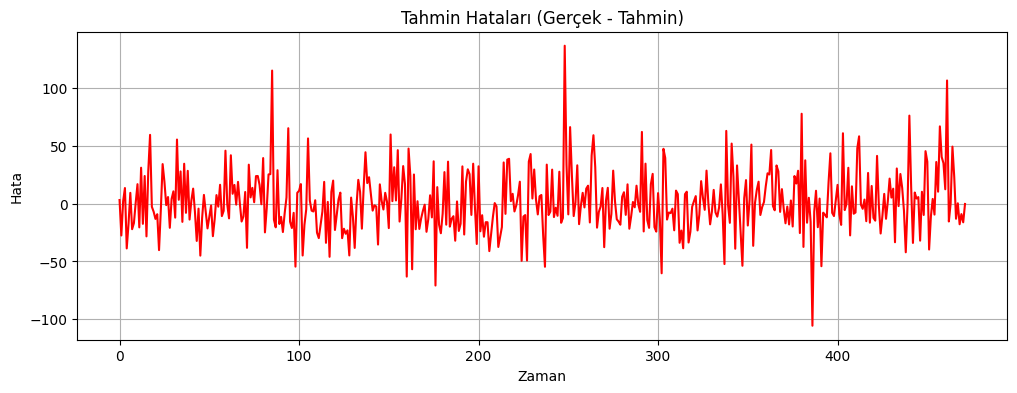

In [ ]:
hatalar = y_test.values - y_pred
plt.figure(figsize=(12, 4))
plt.plot(hatalar, color='red')
plt.title("Tahmin Hataları (Gerçek - Tahmin)")
plt.xlabel("Zaman")
plt.ylabel("Hata")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Yeni skorları yazdır
print("🔹 Random Forest")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

In [ ]:
print(X_train.dtypes)
X = df[features].select_dtypes(include=['number'])
X = X.loc[:, ~X.columns.duplicated()]

Month_sin        float64
Month_cos        float64
Day_sin          float64
Day_cos          float64
Year               int64
Sunspot_lag1     float64
Diff_11Year      float64
Year               int64
Month              int64
Day                int64
Sunspot_lag12    float64
dtype: object


In [ ]:
# Train/test bölmesi (zaman sırasına göre)
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# LightGBM Modeli
import lightgbm as lgb
model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Değerlendirme
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"🔹 R²: {r2_score(y_test, y_pred):.4f}")
print(f"🔹 MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"🔹 MAE: {mean_absolute_error(y_test, y_pred):.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 377, number of used features: 10
[LightGBM] [Info] Start training from score 106.461539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

ValueError: Found input variables with inconsistent numbers of samples: [1983, 95]

In [ ]:
# Train/test bölmesi ve model eğitimi
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Model
import lightgbm as lgb
model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Değerlendirme
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")


LightGBMError: Feature (Year) appears more than one time.